In [ ]:
%pip install -r requirements.txt --user

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
data_file= pd.read_csv('imports.csv')
data_file.head()

,id,pandas,matplotlib.pyplot,__future__,print_function,argparse,os,numpy,models,*,...,rho_red_light,flux,FlattenDenseDropout,l2_norm,plot_3d,laplace_solution,poisson_2d_jacobi,poisson_solution,Base.writemime,ModelCheckpointCSVLogger
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,0,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X=data_file.values[:,1:]
Clus_dataSet=StandardScaler().fit_transform(X)

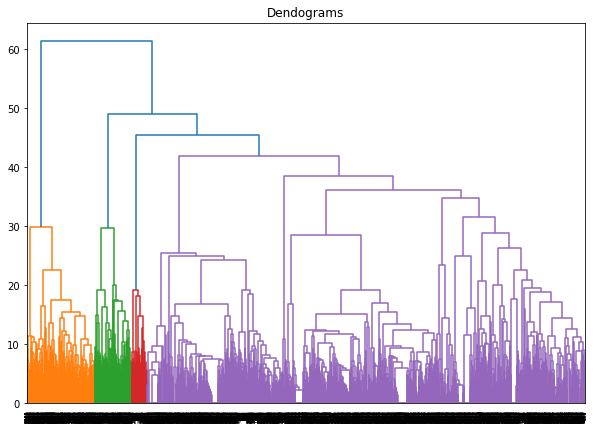

In [5]:
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [4]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=30, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
labels = cluster.labels_


In [5]:
data_file.insert(0,'labels', labels)

labels
0     477
1     287
2      98
3     536
4      81
5     384
6     153
7      94
8     558
9      90
10     90
11     68
12    127
13     47
14    175
15      9
16     86
17    110
18     49
19     81
20     87
21     28
22     13
23     41
24      6
25     21
26    548
27    102
28     72
29     22
Name: id, dtype: int64


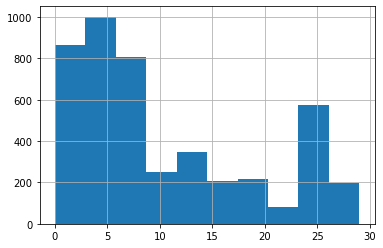

In [25]:
h = data_file['labels'].hist()
fig = h.get_figure()
print(data_file.groupby(['labels'])['id'].count())

In [42]:
df = data_file[data_file.labels ==10]
df = df.loc[:, (df != 0).any(axis=0)]
df

,labels,id,pandas,matplotlib.pyplot,os,numpy,tqdm,PIL,Image,IPython.display,...,dicttoxml,xmltodict,infer_segmentation,train_segmentation,Segmenter,inference_prototype,detector_prototype,eval_detector,Evaluator,infer_detector_nano
3046,10,3046,1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3047,10,3047,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3048,10,3048,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3049,10,3049,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3055,10,3055,0,0,1,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,10,3213,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3215,10,3215,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3216,10,3216,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3217,10,3217,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df.sum()

labels                                     900
id                                      281849
pandas                                       7
matplotlib.pyplot                            1
os                                          90
numpy                                       22
tqdm                                        36
PIL                                          5
Image                                       54
IPython.display                             59
random                                       7
json                                         9
tqdm.notebook                               10
sys                                         90
cv2                                         24
pycocotools.coco                             1
COCO                                         1
skimage.io                                   1
tensorflow                                  11
matplotlib                                   3
pyplot                                       3
tensorflow.ke

In [ ]:
data_file.drop('id', axis=1, inplace=True)

In [9]:
data_file.head()


,labels,pandas,matplotlib.pyplot,__future__,print_function,argparse,os,numpy,models,*,...,rho_red_light,flux,FlattenDenseDropout,l2_norm,plot_3d,laplace_solution,poisson_2d_jacobi,poisson_solution,Base.writemime,ModelCheckpointCSVLogger
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,27,0,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = data_file.iloc[:,:1].values
y = data_file['labels']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

0        1
1        3
2       20
3       27
4       27
        ..
4535     7
4536    26
4537     7
4538     0
4539     0
Name: labels, Length: 4540, dtype: int64
